In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cityblock
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale

%matplotlib inline

def takePlot(centroids, clusterDest, data, k):
  for j, kernel in enumerate(centroids):
    x = []
    y = []
    for i, line in enumerate(data):
      if (clusterDest[i] == j):
        x.append(line[0])
        y.append(line[1])
    plt.scatter(x, y)
  for i in range(k):
    plt.scatter(centroids[i][0], centroids[i][1], marker = 'x', c = 'black')
  plt.show()

def initiate_centroids_forgy(data, num_clusters):
    return data[np.random.choice(data.shape[0], num_clusters, replace=False), :]


def assign_clusters(data, centroids):
    num_datapoints = data.shape[0]
    num_clusters = centroids.shape[0]
    
    distances = np.zeros((num_datapoints,num_clusters))
    for pt in range(num_datapoints):
        for centr in range(num_clusters):
            distances[pt][centr] = (cityblock(data[pt], centroids[centr]))
    return np.argmin(distances, axis=1)


def calculate_centroids(data,clusters_assignment, num_clusters):
    new_centroids=np.zeros((num_clusters,data.shape[1]))
    for centr in range(num_clusters):
        data_in_cluster = data[clusters_assignment==centr]
        for i in range(data.shape[1]):
            new_centroids[centr, i] = data_in_cluster[:,i].mean()
        
    return new_centroids

def KMeans_withoutPlot(data, num_clusters, labels_true):
    num_datapoints = data.shape[0]
    
    step = 0
    
    assigned_cluster = np.zeros(num_datapoints)
    
    converges = True
    
    centroids = initiate_centroids_forgy(data,num_clusters)

    while(converges):
        step = step+1
        previous_assigned_cluster = copy.deepcopy(assigned_cluster)
        assigned_cluster = assign_clusters(data, centroids)

        previous_centroids = copy.deepcopy(centroids)
        centroids = calculate_centroids(data,assigned_cluster, num_clusters)
        
        converges = ( not np.array_equal(previous_assigned_cluster,assigned_cluster)) or (not np.array_equal(previous_centroids,centroids))

    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, assigned_cluster))
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, assigned_cluster))
    print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(labels_true, assigned_cluster))
    print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, assigned_cluster))

def KMeans(data, num_clusters, labels_true):
    num_datapoints = data.shape[0]
    
    step = 0
    
    assigned_cluster = np.zeros(num_datapoints)
    
    converges = True
    
    centroids = initiate_centroids_forgy(data,num_clusters)

    while(converges):
        step = step+1
        previous_assigned_cluster = copy.deepcopy(assigned_cluster)
        assigned_cluster = assign_clusters(data, centroids)

        previous_centroids = copy.deepcopy(centroids)
        centroids = calculate_centroids(data,assigned_cluster, num_clusters)
        
        converges = ( not np.array_equal(previous_assigned_cluster,assigned_cluster)) or (not np.array_equal(previous_centroids,centroids))

    takePlot(centroids, assigned_cluster, data, num_clusters)

    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, assigned_cluster))
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, assigned_cluster))
    print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(labels_true, assigned_cluster))
    print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, assigned_cluster))

Big distance between groups


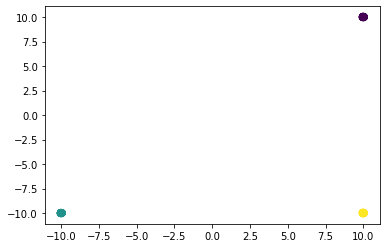

In [13]:
print("Big distance between groups")
samples = 1000
density = 0.025
centers = [[10, 10], [-10, -10], [10, -10]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)

plt.scatter(data[:,0],data[:,1], c=labels_true)

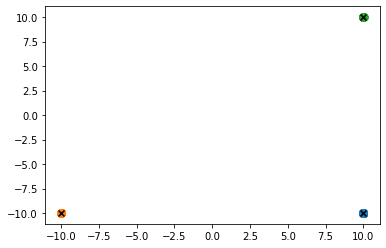

Completeness: 1.000
Homogeneity: 1.000
Adjusted Rand index: 1.000
Adjusted Mutual information: 1.000


In [14]:
KMeans(data, 3, labels_true)

Very small distance between groups


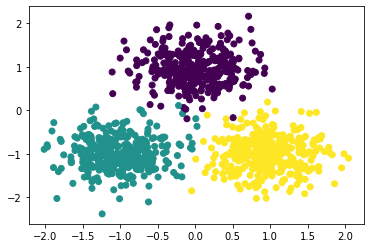

In [15]:
print("Very small distance between groups")
samples = 1000
density = 0.4
centers = [[0, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)
plt.scatter(data[:,0],data[:,1], c=labels_true)

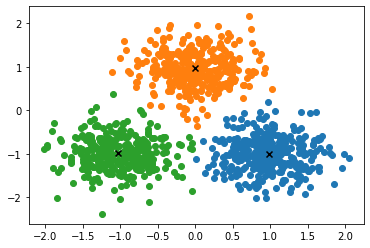

Completeness: 0.955
Homogeneity: 0.955
Adjusted Rand index: 0.976
Adjusted Mutual information: 0.955


In [16]:
KMeans(data, 3, labels_true)

Average intersection area of classes is 10-20%


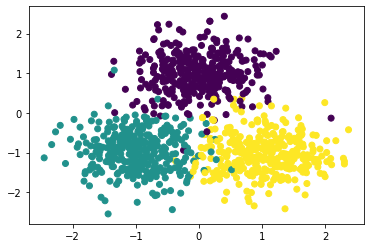

In [17]:
print("Average intersection area of classes is 10-20%")
samples = 1000
density = 0.5
centers = [[0, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)

plt.scatter(data[:,0],data[:,1], c=labels_true)

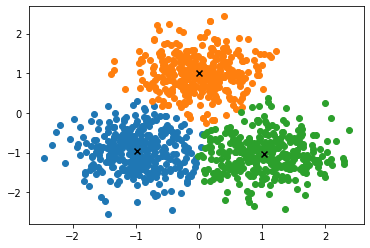

Completeness: 0.820
Homogeneity: 0.820
Adjusted Rand index: 0.881
Adjusted Mutual information: 0.819


In [18]:
KMeans(data, 3, labels_true)

Average intersection area of classes is 50-70%


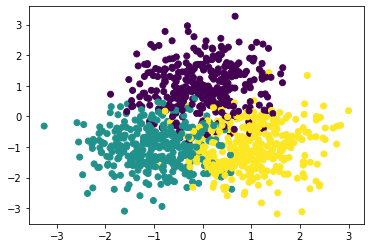

In [19]:
print("Average intersection area of classes is 50-70%")
samples = 1000
density = 0.7
centers = [[0, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)

plt.scatter(data[:,0],data[:,1], c=labels_true)

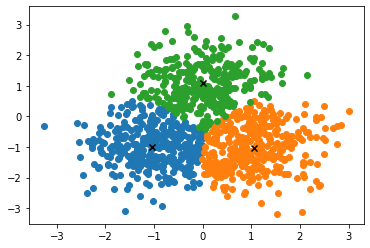

Completeness: 0.615
Homogeneity: 0.615
Adjusted Rand index: 0.694
Adjusted Mutual information: 0.614


In [20]:
KMeans(data, 3, labels_true)

In [21]:
print("Dataset Breast cancer Wisconsin")
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X = scale(X)

KMeans_withoutPlot(X, 2, y)

Dataset Breast cancer Wisconsin
Completeness: 0.598
Homogeneity: 0.541
Adjusted Rand index: 0.640
Adjusted Mutual information: 0.568


In [22]:
print("Dataset Wine")
dataset = load_wine()
X = dataset.data
y = dataset.target
X = scale(X)

KMeans_withoutPlot(X, 2, y)

Dataset Wine
Completeness: 0.650
Homogeneity: 0.396
Adjusted Rand index: 0.380
Adjusted Mutual information: 0.489
